Minority class= 1 : 1475039
Majority class= 0 : 3493645
Proportion: 0.42 : 1


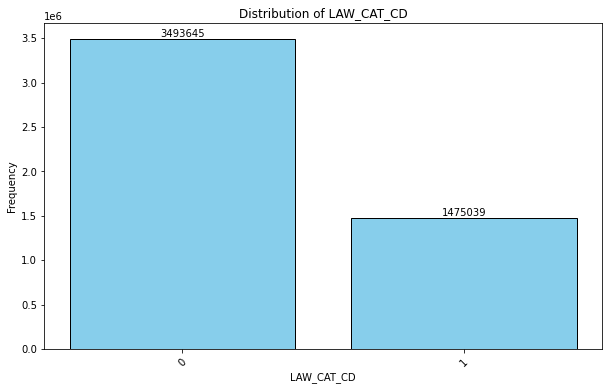

In [3]:
import pandas as pd
from pandas import read_csv, concat, DataFrame, Series
from matplotlib.pyplot import figure, show, gca
from matplotlib.axes import Axes
from matplotlib.container import BarContainer
from matplotlib import rcParams

# Load the dataset
file_path = '/Users/pascalludwig/Documents/Master/Semester 1/Term 2/Data Science/Project/DataScience/Projeto/Preparation/new_class_ny_arrests.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Define some constants for visual styling
LINE_COLOR = "black"
FILL_COLOR = "skyblue"
FONT_TEXT = rcParams['font.size']

def set_chart_labels(ax: Axes, title: str, xlabel: str, ylabel: str) -> Axes:
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

def set_chart_xticks(xvalues: list, ax: Axes, percentage: bool = False) -> Axes:
    labels = [f"{x:.0%}" if percentage else f"{x}" for x in xvalues]
    ax.set_xticks(range(len(xvalues)))
    ax.set_xticklabels(labels, rotation=45)
    return ax

def plot_bar_chart(
    xvalues: list,
    yvalues: list,
    ax: Axes = None,  # type: ignore
    title: str = "",
    xlabel: str = "",
    ylabel: str = "",
    percentage: bool = False,
) -> Axes:
    if ax is None:
        ax = gca()
    ax = set_chart_labels(ax=ax, title=title, xlabel=xlabel, ylabel=ylabel)
    ax = set_chart_xticks(xvalues, ax=ax, percentage=percentage)
    values: BarContainer = ax.bar(
        xvalues,
        yvalues,
        edgecolor=LINE_COLOR,
        color=FILL_COLOR
    )
    format_str = "%.2f" if percentage else "%.0f"
    ax.bar_label(values, fmt=format_str)

    return ax

# Analyze the target variable `LAW_CAT_CD`
target = 'LAW_CAT_CD'
class_counts = data[target].value_counts()

# Display class information
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

print("Minority class=", minority_class, ":", class_counts[minority_class])
print("Majority class=", majority_class, ":", class_counts[majority_class])
print(
    "Proportion:",
    round(class_counts[minority_class] / class_counts[majority_class], 2),
    ": 1",
)

# Plotting the bar chart
fig = figure(figsize=(10, 6))
ax = fig.add_subplot(111)
plot_bar_chart(
    xvalues=class_counts.index.tolist(),
    yvalues=class_counts.values.tolist(),
    ax=ax,
    title="Distribution of LAW_CAT_CD",
    xlabel="LAW_CAT_CD",
    ylabel="Frequency"
)

show()


In [4]:
# Split the dataset into two subdatasets: one for each class
df_positives = data[data[target] == minority_class]
df_negatives = data[data[target] == majority_class]

# Display the size of each subset
print(f"Number of rows in the positive class ({minority_class}): {len(df_positives)}")
print(f"Number of rows in the negative class ({majority_class}): {len(df_negatives)}")

# Optionally, save the subsets for further exploration
df_positives.to_csv("positive_class_arrests.csv", index=False)
df_negatives.to_csv("negative_class_arrests.csv", index=False)

# Sampling example: Adjust the number of rows in the positive class to balance the dataset
# Uncomment below to sample as needed
# sampled_positives = df_positives.sample(n=len(df_negatives), random_state=42)
# balanced_dataset = pd.concat([sampled_positives, df_negatives], axis=0)

# Save the balanced dataset for further exploration
# balanced_dataset.to_csv("balanced_dataset.csv", index=False)


Number of rows in the positive class (1): 1475039
Number of rows in the negative class (0): 3493645


Undersampling

Oversampling